In [1]:
# import modules
import numpy as np
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

In [2]:
# observations
data = np.array([[1, 3, 4, 5, 2],
                 [2, 3, 1, 6, 3],
                 [1, 5, 2, 3, 1],
                 [3, 4, 9, 2, 1]])
  
# normalize
data = whiten(data)
  
print(data)

[[1.20604538 3.61813613 1.29777137 3.16227766 2.41209076]
 [2.41209076 3.61813613 0.32444284 3.79473319 3.61813613]
 [1.20604538 6.03022689 0.64888568 1.8973666  1.20604538]
 [3.61813613 4.82418151 2.91998558 1.26491106 1.20604538]]


In [3]:
# code book generation
centroids, mean_value = kmeans(data, 3)
  
print("Code book :\n", centroids, "\n")
print("Mean of Euclidean distances :", 
      mean_value.round(4))

Code book :
 [[1.80906807 3.61813613 0.81110711 3.47850543 3.01511345]
 [3.61813613 4.82418151 2.91998558 1.26491106 1.20604538]
 [1.20604538 6.03022689 0.64888568 1.8973666  1.20604538]] 

Mean of Euclidean distances : 0.5158


In [4]:
# mapping the centroids
clusters, distances = vq(data, centroids)
  
print("Cluster index :", clusters, "\n")
print("Distance from the centroids :", distances)

Cluster index : [0 0 2 1] 

Distance from the centroids : [1.03155942 1.03155942 0.         0.        ]


In [5]:

# assign centroids and clusters
centroids, clusters = kmeans2(data, 3, 
                              minit='random')
  
print("Centroids :\n", centroids, "\n")
print("Clusters :", clusters)

Centroids :
 [[1.80906807 3.61813613 0.81110711 3.47850543 3.01511345]
 [3.61813613 4.82418151 2.91998558 1.26491106 1.20604538]
 [1.20604538 6.03022689 0.64888568 1.8973666  1.20604538]] 

Clusters : [0 0 2 1]


Data :
 [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  1.    107.     72.    ...  30.8     0.821  24.   ]
 [  0.    105.     68.    ...  20.      0.236  22.   ]
 [  1.    109.     60.    ...  25.4     0.947  21.   ]] 

Code-book :
 [[0.60969596 3.43971479 3.37845181 1.49778568 0.72397925 3.8769763
  1.44468432 2.29822572]
 [2.06911177 4.08964295 3.90274464 0.96677853 0.5659603  4.05276844
  1.32136554 3.89815455]] 

Clusters :
 [1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1
 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0

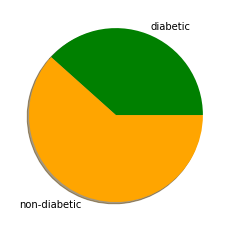

In [6]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import whiten, kmeans, vq
  
# load the dataset
dataset = np.loadtxt(r"diabetes-train.csv",
                     delimiter=",")
  
# excluding the outcome column
dataset = dataset[:, 0:8]
  
print("Data :\n", dataset, "\n")
  
# normalize
dataset = whiten(dataset)
  
# generate code book
centroids, mean_dist = kmeans(dataset, 2)
print("Code-book :\n", centroids, "\n")
  
clusters, dist = vq(dataset, centroids)
print("Clusters :\n", clusters, "\n")
# count non-diabetic patients
non_diab = list(clusters).count(0)
  
# count diabetic patients
diab = list(clusters).count(1)
  
# depict illustration
x_axis = []
x_axis.append(diab)
x_axis.append(non_diab)
  
colors = ['green', 'orange']
  
print("No.of.diabetic patients : " + str(x_axis[0]) +
      "\nNo.of.non-diabetic patients : " + str(x_axis[1]))
  
y = ['diabetic', 'non-diabetic']
  
plt.pie(x_axis, labels=y, colors=colors, shadow='true')
plt.show()